# Regression Modeling for Stock Prediction

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
# Step 1: Download the Data

tickers = ('AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC')
start_date = '2020-01-01'
end_date = '2024-12-31'

df = yf.download(tickers, start_date, end_date)['Close']
df


C:\Users\sahil\AppData\Local\Temp\ipykernel_1500\2293748721.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start_date, end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.468269,94.900497,152.505707,208.848953,3257.850098
2020-01-03,71.763733,93.748497,150.606720,206.935898,3234.850098
2020-01-06,72.335556,95.143997,150.995972,208.269241,3246.280029
2020-01-07,71.995361,95.343002,149.619308,208.240280,3237.179932
2020-01-08,73.153503,94.598503,152.002457,209.805450,3253.050049
...,...,...,...,...,...
2024-12-23,254.120682,225.059998,432.062775,520.901855,5974.069824
2024-12-24,257.037476,229.050003,436.112885,527.965210,6040.040039
2024-12-26,257.853790,227.050003,434.901794,527.606506,6037.589844


In [4]:
# Perform Features Engineering 
# Shift the value by one

df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)



In [5]:
# Moving Average 5 (Technical Indicator)

df['AAPL_MA5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA5'] = df['MSFT'].rolling(window=5).mean()
df['MSFT_MA5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA5'] = df['^GSPC'].rolling(window=5).mean()


In [6]:
# Set Y Variable(next day)

df['Target'] = df['AAPL'].shift(-1)

In [7]:
df.dropna(inplace = True)
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA5,AMZN_MA5,MSFT_MA5,QQQ_MA5,^GSPC_MA5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.153503,94.598503,152.002457,209.805450,3253.050049,71.995361,95.343002,149.619308,208.240280,3237.179932,72.343285,151.146033,151.146033,208.419965,3245.842041,74.707336
2020-01-09,74.707336,95.052498,153.901443,211.583237,3274.699951,73.153503,94.598503,152.002457,209.805450,3253.050049,72.791098,151.425180,151.425180,208.966821,3249.212012,74.876251
2020-01-10,74.876251,94.157997,153.189301,211.042114,3265.350098,74.707336,95.052498,153.901443,211.583237,3274.699951,73.413602,151.941696,151.941696,209.788065,3255.312012,76.475906
2020-01-13,76.475906,94.565002,155.031281,213.476944,3288.129883,74.876251,94.157997,153.189301,211.042114,3265.350098,74.241672,152.748758,152.748758,210.829605,3263.681982,75.443230
2020-01-14,75.443230,93.472000,153.939423,212.636383,3283.149902,76.475906,94.565002,155.031281,213.476944,3288.129883,74.931245,153.612781,153.612781,211.708826,3272.875977,75.119904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,253.344177,224.919998,433.402924,515.875793,5930.850098,248.665329,223.289993,433.829742,511.409973,5867.080078,250.238229,440.166986,440.166986,521.837634,5958.956055,254.120682
2024-12-23,254.120682,225.059998,432.062775,520.901855,5974.069824,253.344177,224.919998,433.402924,515.875793,5930.850098,251.080420,436.922919,436.922919,518.961792,5938.954004,257.037476
2024-12-24,257.037476,229.050003,436.112885,527.965210,6040.040039,254.120682,225.059998,432.062775,520.901855,5974.069824,252.020169,433.919080,433.919080,517.970081,5936.840039,257.853790


In [8]:
# See how many and which columns are in my dataframe
df.columns

Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA5', 'AMZN_MA5',
       'MSFT_MA5', 'QQQ_MA5', '^GSPC_MA5', 'Target'],
      dtype='object', name='Ticker')

In [9]:
# Checking if there is any NaN values in the columns
print(df.isna().sum())

Ticker
AAPL          0
AMZN          0
MSFT          0
QQQ           0
^GSPC         0
AAPL(t-1)     0
AMZN(t-1)     0
MSFT(t-1)     0
QQQ(t-1)      0
^GSPC(t-1)    0
AAPL_MA5      0
AMZN_MA5      0
MSFT_MA5      0
QQQ_MA5       0
^GSPC_MA5     0
Target        0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1252 entries, 2020-01-08 to 2024-12-27
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAPL        1252 non-null   float64
 1   AMZN        1252 non-null   float64
 2   MSFT        1252 non-null   float64
 3   QQQ         1252 non-null   float64
 4   ^GSPC       1252 non-null   float64
 5   AAPL(t-1)   1252 non-null   float64
 6   AMZN(t-1)   1252 non-null   float64
 7   MSFT(t-1)   1252 non-null   float64
 8   QQQ(t-1)    1252 non-null   float64
 9   ^GSPC(t-1)  1252 non-null   float64
 10  AAPL_MA5    1252 non-null   float64
 11  AMZN_MA5    1252 non-null   float64
 12  MSFT_MA5    1252 non-null   float64
 13  QQQ_MA5     1252 non-null   float64
 14  ^GSPC_MA5   1252 non-null   float64
 15  Target      1252 non-null   float64
dtypes: float64(16)
memory usage: 166.3 KB


In [11]:
# Run Linear Regression Model

import statsmodels.api as sm

X = df[ [ 'AAPL(t-1)', 'AMZN(t-1)', 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA5', 'AMZN_MA5',
       'MSFT_MA5', 'QQQ_MA5', '^GSPC_MA5' ] ]
Y = df['Target']

x_Const = sm.add_constant(X) # Intercept

# Train the model
model = sm.OLS(Y, x_Const).fit()

# Summary of the Model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:55:42   Log-Likelihood:                -3381.7
No. Observations:                1252   AIC:                             6783.
Df Residuals:                    1242   BIC:                             6835.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4174      1.138      0.367      0.714      -1.815       2.650
AAPL(t-1)      0.4601      0.081      5.703      0.000       0.302       0.618
AMZN(t-1)      0.0068      0.010      0.695      0.487      -0.012       0.026
MSFT(t-1)     -0.0132      0.052     -0.253      0.800      -0.116       0.089
QQQ(t-1)       0.0499      0.090      0.556      0.578      -0.126       0.226
^GSPC(t-1)     0.0040      0.007      0.574      0.566      -0.010       0.018
AAPL_MA5       0.5243      0.082      6.430      0.000       0.364       0.684
AMZN_MA5       0.0129      0.026      0.487      0.626      -0.039       0.065
MSFT_MA5       0.0129      0.026      0.487      0.626      -0.039       0.065
QQQ_MA5       -0.0530      0.091     -0.583      0.560      -0.231       0.125
^GSPC_MA5     -0.0043      0.007     -0.610      0.542      -0.018       0.010
==============================================================================
Omnibus:                       26.686   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.277
Skew:                          -0.089   Prob(JB):                     7.33e-12
Kurtosis:                       3.975   Cond. No.                     7.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.03e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
# Run Linear Regression Model

import statsmodels.api as sm

X = df[ [ 'AAPL(t-1)', '^GSPC(t-1)' ] ]

Y = df['Target']

x_Const = sm.add_constant(X) # Intercept

# Train the model
model = sm.OLS(Y, x_Const).fit()

# Summary of the Model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.762e+04
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:55:42   Log-Likelihood:                -3420.7
No. Observations:                1252   AIC:                             6847.
Df Residuals:                    1249   BIC:                             6863.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7172      0.748     -0.959      0.338      -2.185       0.750
AAPL(t-1)      0.9840      0.007    140.621      0.000       0.970       0.998
^GSPC(t-1)     0.0008      0.000      2.114      0.035     5.8e-05       0.002
==============================================================================
Omnibus:                       40.865   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.864
Skew:                          -0.036   Prob(JB):                     2.79e-23
Kurtosis:                       4.409   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Predict the value using the Actual Price

df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(x_Const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.707336,72.734141
2020-01-09,74.876251,73.886544
2020-01-10,76.475906,75.432966
2020-01-13,75.443230,75.591649
2020-01-14,75.119904,77.184070
...,...,...
2024-12-20,254.120682,248.696998
2024-12-23,257.037476,253.352384
2024-12-24,257.853790,254.151282


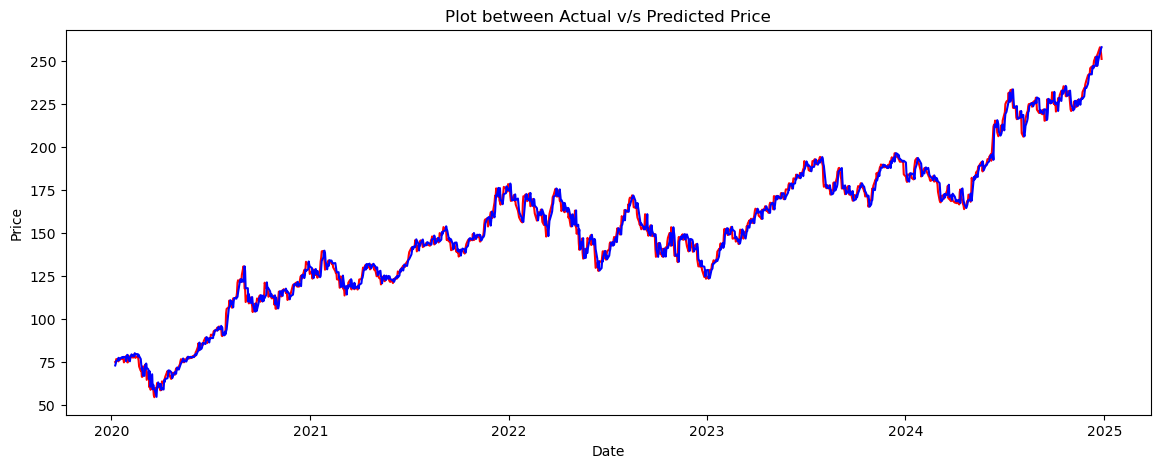

In [14]:
# Plot between Actual vs Predict

import matplotlib.pyplot as plt

plt.figure( figsize = (14,5))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label='Actual', color = 'red')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label='Predicted', color = 'blue')
plt.title('Plot between Actual v/s Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Check the assumption of the LR model



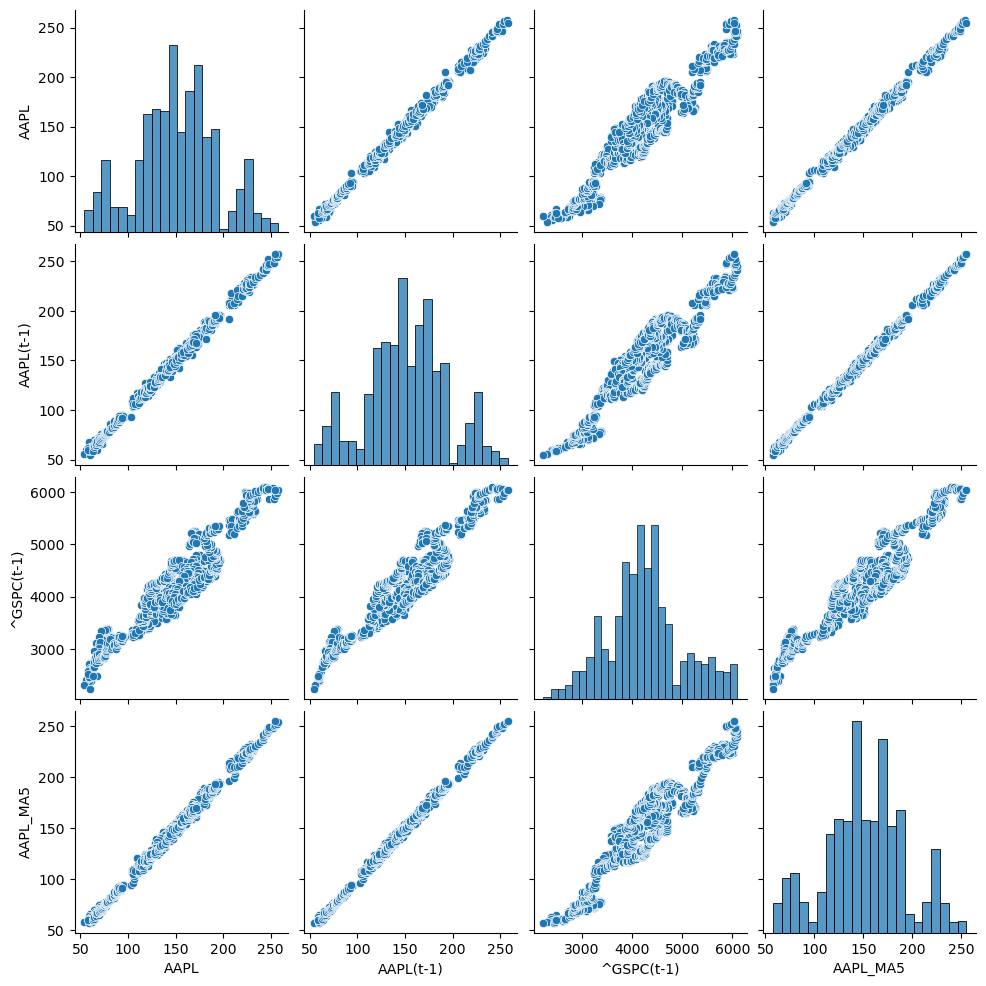

In [16]:
# 1) Linearity between dependent and independent

import seaborn as sns

df = df[['AAPL', 'AAPL(t-1)', '^GSPC(t-1)', 'AAPL_MA5']]
sns.pairplot(df)

In [17]:
# 2) Multicollinearity => using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x_Const.columns
vif['vif'] = [variance_inflation_factor(x_Const.values, i) for i in range(x_Const.shape[1])]
vif = vif[1:]
vif

,features,vif
1,AAPL(t-1),7.634911
2,^GSPC(t-1),7.634911


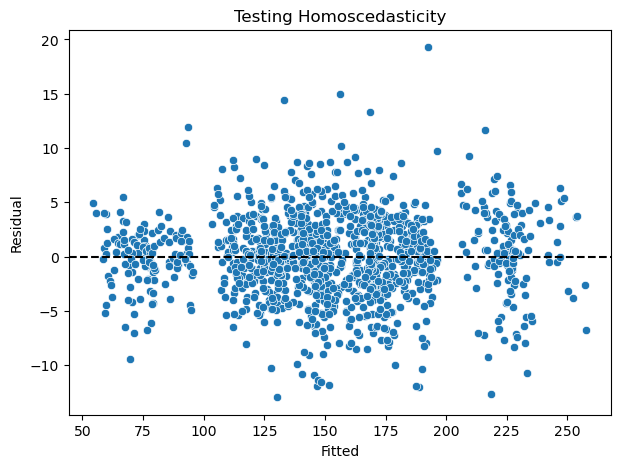

In [18]:
# Homoscedasticity => fitting residual with predicted value

residual = model.resid # Actual - Predicted
fitted = model.fittedvalues # Predict Y Value

plt.figure( figsize = (7,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color='black', linestyle='--')
plt.title('Testing Homoscedasticity')
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.show()

# This graph does not look like the funnel 

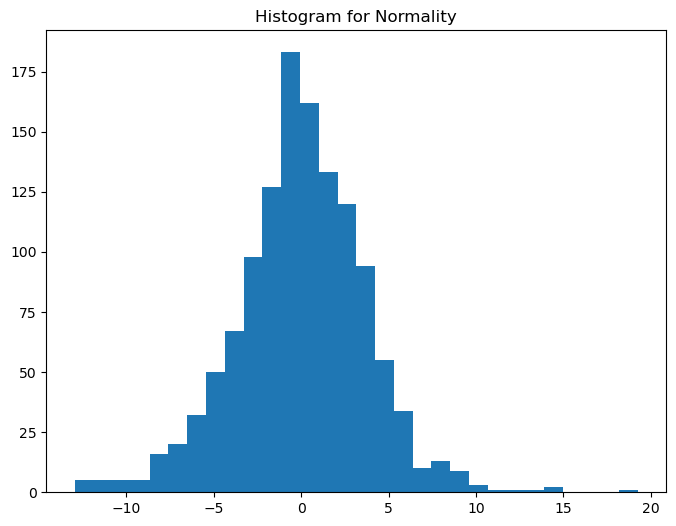

In [19]:
# 4) Normality of residual => Histogram or QQ plot
# Histogram

plt.figure(figsize = (8,6))
plt.hist(residual, bins=30)
plt.title('Histogram for Normality')
plt.show()

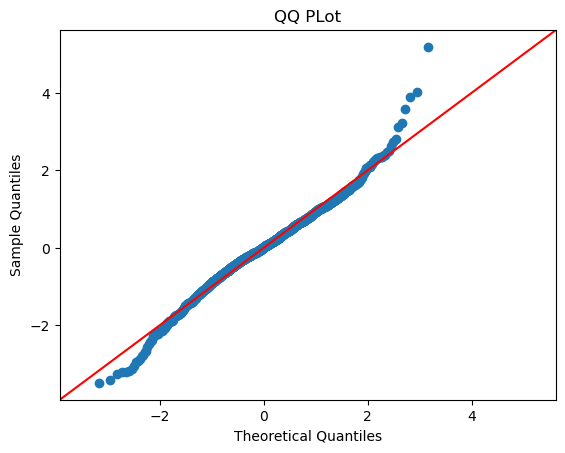

In [20]:
# QQ Plot

sm.qqplot(residual, line ='45', fit = True)
plt.title('QQ PLot')
plt.show()

In [21]:
# Auto Correlation of Residual => Durbin Watson Test

from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residual)
dw

1.0410072213200119

# Predict the stock price for the year 2025


In [23]:
# Step 1: Download the data from Yahoo Finance

tickers = ('AAPL', '^GSPC')
start_date = '2025-01-01'
end_date = '2025-03-31'

df = yf.download(tickers, start_date, end_date)['Close']
df.head()

C:\Users\sahil\AppData\Local\Temp\ipykernel_1500\3989341984.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start_date, end_date)['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,242.752090,5868.549805
2025-01-03,242.264297,5942.470215
2025-01-06,243.896912,5975.379883
2025-01-07,241.119476,5909.029785
2025-01-08,241.607269,5918.250000


In [24]:
# Step 2: Feature Engineer

df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df = df.dropna()
df.head()

Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.264297,5942.470215,242.752090,5868.549805
2025-01-06,243.896912,5975.379883,242.264297,5942.470215
2025-01-07,241.119476,5909.029785,243.896912,5975.379883
2025-01-08,241.607269,5918.250000,241.119476,5909.029785
2025-01-10,235.783600,5827.040039,241.607269,5918.250000


In [25]:
X_test = df[ ['AAPL(t-1)', '^GSPC(t-1)'] ]
x_test = sm.add_constant(X_test)

df_result = pd.DataFrame()
df_result['Actual'] = df['AAPL']
df_result['Predicted'] = model.predict(x_test)
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,242.264297,242.879509
2025-01-06,243.896912,242.459055
2025-01-07,241.119476,244.092067
2025-01-08,241.607269,241.305608
2025-01-10,235.783600,241.793027


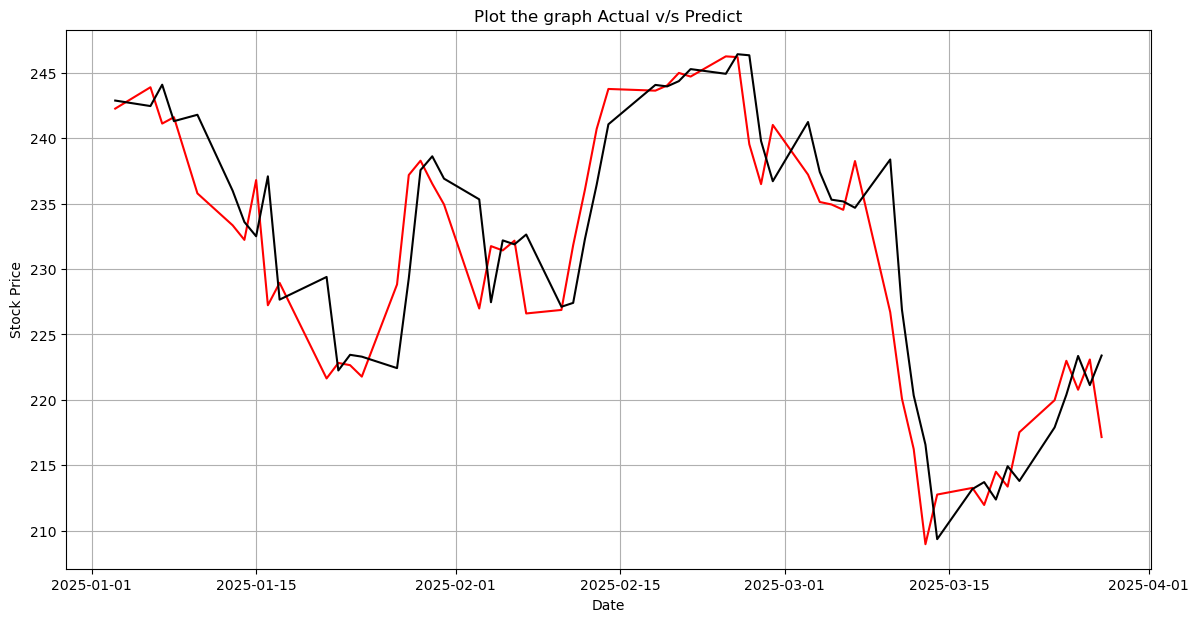

In [26]:
# Plot Actual V/S Predicted

plt.figure( figsize = (14,7))
plt.plot(df_result.index, df_result['Actual'], label='Actual', color='red')
plt.plot(df_result.index, df_result['Predicted'], label='predict', color='black')
plt.title('Plot the graph Actual v/s Predict')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [27]:
# Risk Metrics => Calculate RMSE and MSE

from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(df_result['Actual'], df_result['Predicted'])

mse = mean_squared_error(df_result['Actual'], df_result['Predicted']) # MSE

rmse = np.sqrt(mse) # RMSE

print('R2 =', r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2 = 0.8348121724833452
MSE: 17.23421034626402
RMSE: 4.151410645342619
